In [10]:
# Grundlegende Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import statsmodels.api as sm
from scipy import stats

In [11]:
# Einstellungen für bessere Plots
plt.rcParams['figure.figsize'] = (10, 6)

# Pandas Optionen
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [12]:
path = kagglehub.dataset_download("priyamchoksi/credit-card-transactions-dataset")

ds = pd.read_csv(f"{path}/credit_card_transactions.csv")


Korrelation Alter ↔ Betrag:
 Pearson : -0.0097
 Spearman: -0.0235
 Kendall : -0.0156


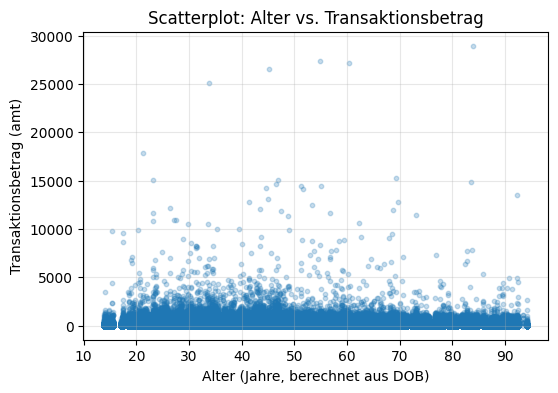

In [13]:
# Alter berechnen
ds["dob"] = pd.to_datetime(ds["dob"], errors="coerce")
age = (pd.Timestamp("2019-01-01") - ds["dob"]).dt.days / 365.25

# Korrelationen berechnen
pearson_corr  = age.corr(ds["amt"], method="pearson")
spearman_corr = age.corr(ds["amt"], method="spearman")
kendall_corr  = age.corr(ds["amt"], method="kendall")

print("Korrelation Alter ↔ Betrag:")
print(f" Pearson : {pearson_corr: .4f}")
print(f" Spearman: {spearman_corr: .4f}")
print(f" Kendall : {kendall_corr: .4f}")

# Scatterplot
plt.figure(figsize=(6,4))
plt.scatter(age, ds["amt"], alpha=0.25, s=10)
plt.title("Scatterplot: Alter vs. Transaktionsbetrag")
plt.xlabel("Alter (Jahre, berechnet aus DOB)")
plt.ylabel("Transaktionsbetrag (amt)")
plt.grid(True, alpha=0.3)
plt.show()

Korrelation Stadtgröße (city_pop) ↔ Betrag (amt)
 Pearson :  0.0058
 Spearman: -0.0236
 Kendall : -0.0157


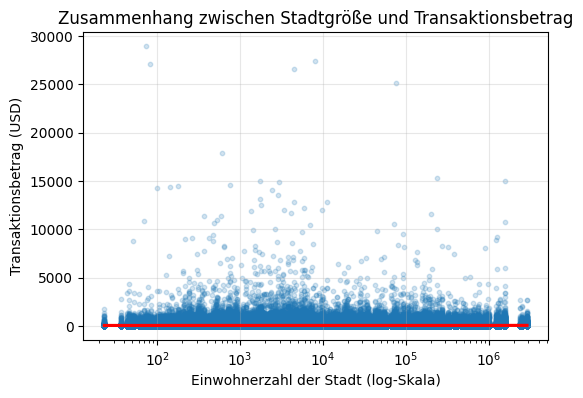

In [14]:
# --- Korrelationen berechnen ---
pearson  = ds["city_pop"].corr(ds["amt"], method="pearson")
spearman = ds["city_pop"].corr(ds["amt"], method="spearman")
kendall  = ds["city_pop"].corr(ds["amt"], method="kendall")

print("Korrelation Stadtgröße (city_pop) ↔ Betrag (amt)")
print(f" Pearson : {pearson: .4f}")
print(f" Spearman: {spearman: .4f}")
print(f" Kendall : {kendall: .4f}")

# --- Scatterplot mit Regressionslinie ---
plt.figure(figsize=(6,4))
sns.regplot(
    x="city_pop", 
    y="amt", 
    data=ds, 
    scatter_kws={"alpha":0.2, "s":10}, 
    line_kws={"color":"red"}
)
plt.xscale("log")   # log-Skala, da city_pop stark variiert (kleine & große Städte)
plt.title("Zusammenhang zwischen Stadtgröße und Transaktionsbetrag")
plt.xlabel("Einwohnerzahl der Stadt (log-Skala)")
plt.ylabel("Transaktionsbetrag (USD)")
plt.grid(True, alpha=0.3)
plt.show()

Korrelation Betrag (amt) ↔ Zeit (unix_time)
 Pearson : -0.0003
 Spearman:  0.0006
 Kendall :  0.0004


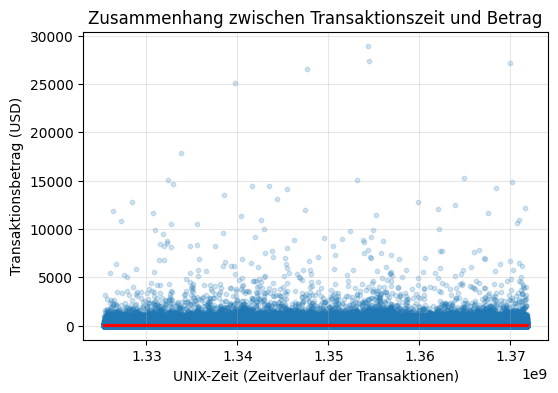

In [15]:
# --- Korrelationen berechnen ---
pearson  = ds["amt"].corr(ds["unix_time"], method="pearson")
spearman = ds["amt"].corr(ds["unix_time"], method="spearman")
kendall  = ds["amt"].corr(ds["unix_time"], method="kendall")

print("Korrelation Betrag (amt) ↔ Zeit (unix_time)")
print(f" Pearson : {pearson: .4f}")
print(f" Spearman: {spearman: .4f}")
print(f" Kendall : {kendall: .4f}")

# --- Scatterplot mit Regressionslinie ---
plt.figure(figsize=(6,4))
sns.regplot(
    x="unix_time", 
    y="amt", 
    data=ds, 
    scatter_kws={"alpha":0.2, "s":10},
    line_kws={"color":"red"}
)
plt.title("Zusammenhang zwischen Transaktionszeit und Betrag")
plt.xlabel("UNIX-Zeit (Zeitverlauf der Transaktionen)")
plt.ylabel("Transaktionsbetrag (USD)")
plt.grid(True, alpha=0.3)
plt.show()

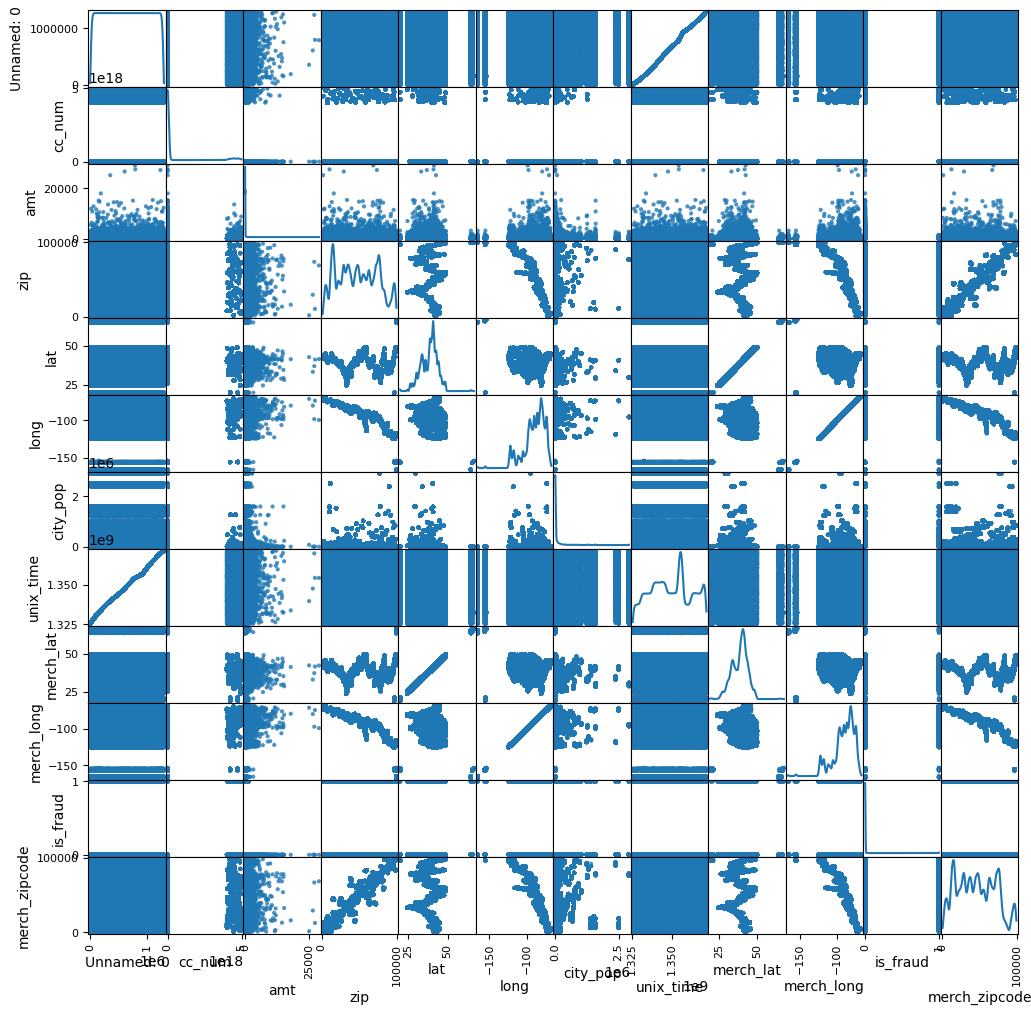

In [18]:
numeric_ds = ds.select_dtypes(include='number')

# Scatterplot matrix
pd.plotting.scatter_matrix(numeric_ds, alpha=0.8, figsize=(12, 12), diagonal='kde')
plt.show()

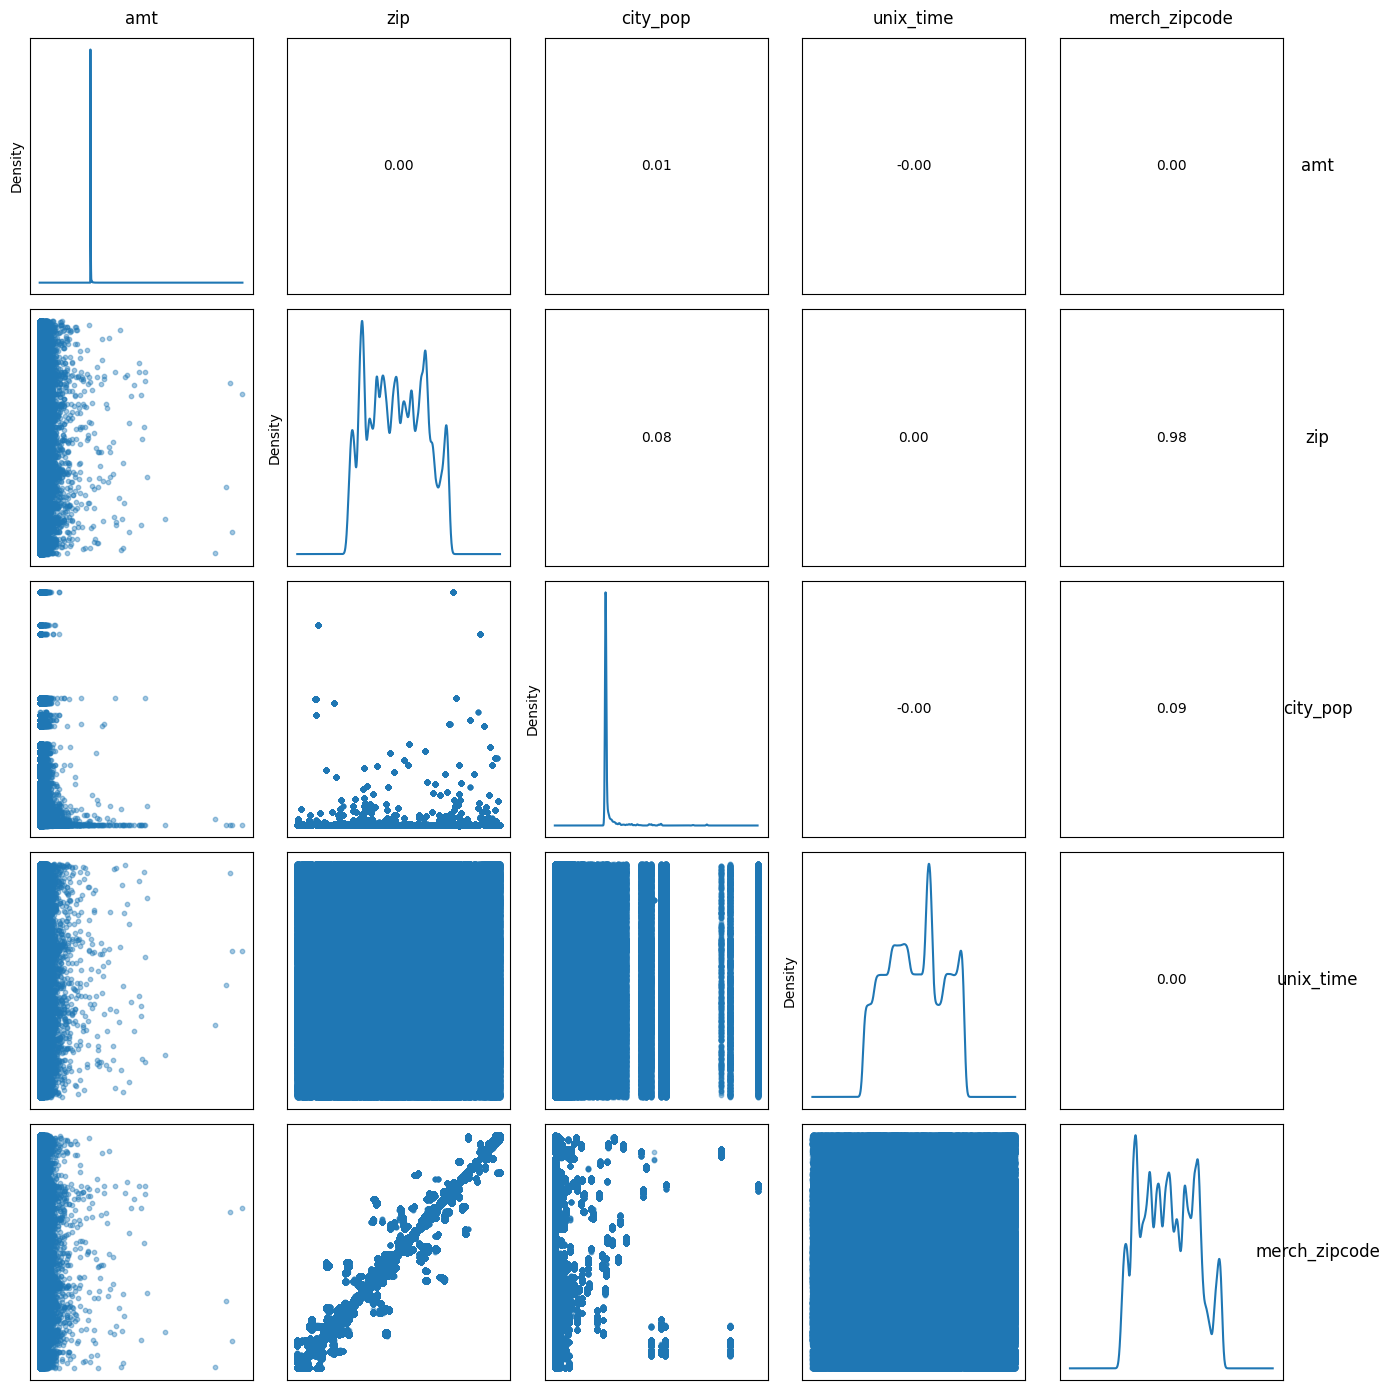

In [28]:
import numpy as np

numeric_ds = ds.select_dtypes(include='number')

numeric_ds.drop(columns=["Unnamed: 0","cc_num","lat","long","merch_lat","merch_long","is_fraud"], inplace=True)

num_cols = numeric_ds.select_dtypes(include='number').columns
n = len(num_cols)

fig, axes = plt.subplots(n, n, figsize=(14, 14))

for i, col1 in enumerate(num_cols):
    for j, col2 in enumerate(num_cols):
        ax = axes[i, j]
        
        # Untere Dreiecksmatrix: Scatterplots
        if i > j:
            ax.scatter(numeric_ds[col2], numeric_ds[col1], alpha=0.4, s=10)
        
        # Obere Dreiecksmatrix: Korrelationswerte
        elif i < j:
            corr = numeric_ds[col1].corr(numeric_ds[col2])
            ax.text(0.5, 0.5, f'{corr:.2f}', ha='center', va='center', fontsize=10)
        
        # Diagonale: KDE-Dichtekurve mit Pandas
        else:
            numeric_ds[col1].plot(kind='kde', ax=ax, lw=1.5)
        
        # Achsen ausblenden für Übersicht
        ax.set_xticks([])
        ax.set_yticks([])

        # Nur äußere Beschriftungen beibehalten
        if i < n - 1:
            ax.set_xticklabels([])
        if j > 0:
            ax.set_yticklabels([])

# Spaltennamen oben
for j, col in enumerate(num_cols):
    axes[0, j].set_title(col, fontsize=12, pad=10)

# Zeilennamen rechts
for i, col in enumerate(num_cols):
    axes[i, -1].yaxis.set_label_position("right")
    axes[i, -1].set_ylabel(col, rotation=0, labelpad=25, fontsize=12, va='center')

plt.tight_layout()
plt.show()

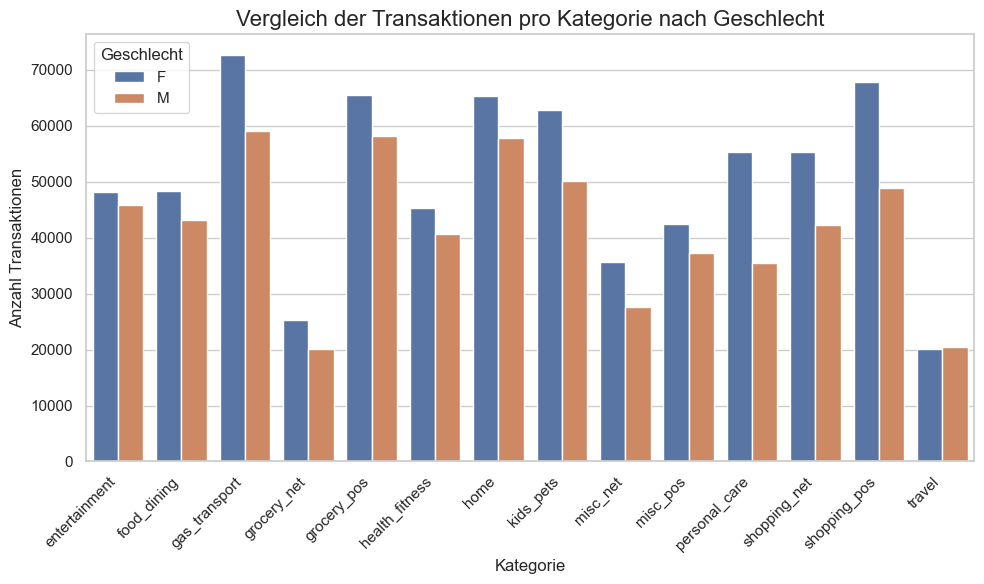

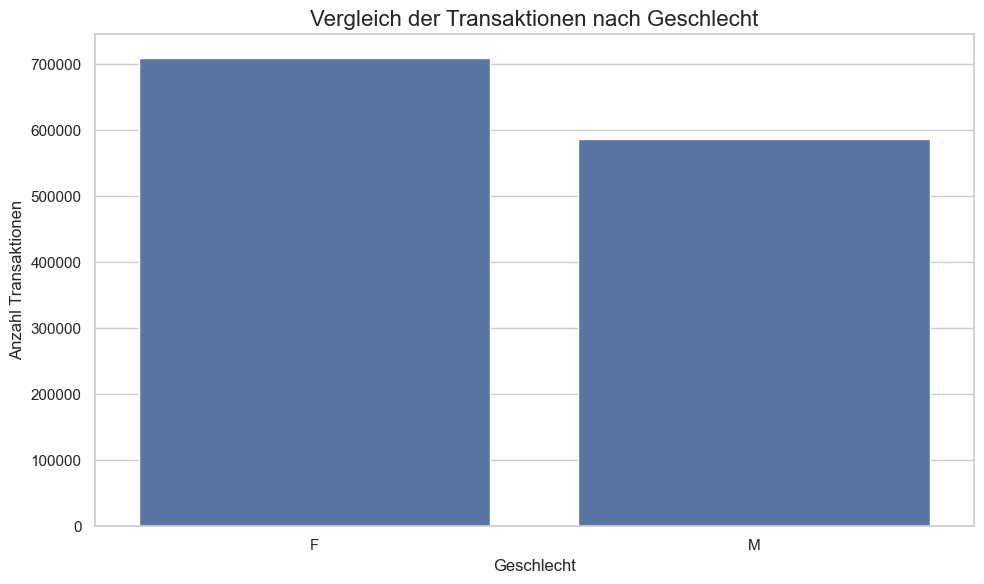

In [31]:
sns.set(style="whitegrid")

# Gruppieren nach Kategorie und Geschlecht und die Anzahl zählen
category_gender_counts = ds.groupby(['category', 'gender']).size().reset_index(name='count')

# Balkendiagramm erstellen
plt.figure()
sns.barplot(x='category', y='count', hue='gender', data=category_gender_counts)

# Diagramm anpassen
plt.title("Vergleich der Transaktionen pro Kategorie nach Geschlecht", fontsize=16)
plt.xlabel("Kategorie", fontsize=12)
plt.ylabel("Anzahl Transaktionen", fontsize=12)
plt.xticks(rotation=45, ha='right')  # x-Achsenbeschriftungen lesbar machen
plt.legend(title='Geschlecht')
plt.tight_layout()

plt.figure()
gender_counts = ds.groupby("gender").size().reset_index(name="count")
sns.barplot(x='gender', y='count', data=gender_counts)
plt.title("Vergleich der Transaktionen nach Geschlecht", fontsize=16)
plt.xlabel("Geschlecht", fontsize=12)
plt.ylabel("Anzahl Transaktionen", fontsize=12)
plt.tight_layout()



Es gibt kein Simpson Paradox bzgl. der Transaktionen nach Geschlecht stratifiziert nach Kategorie verglichen zur gesamten Transaktionsverteilung zwischen Mann und Frau. Einzig bei der Kategorie 'travel' hatten die Männer minimal mehr Transaktionen.